<a href="https://colab.research.google.com/github/Edinson1408/MI_Coffee/blob/main/MaquinaSoporteVectorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_score, recall_score
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

In [2]:
# Función para aplicar SNV
def snv(input_data):
    mean = np.mean(input_data, axis=1).reshape(-1, 1)
    std_dev = np.std(input_data, axis=1).reshape(-1, 1)
    std_dev[std_dev == 0] = np.finfo(float).eps  # Evita la división por cero
    return (input_data - mean) / std_dev

In [ ]:
# Cargar los nuevos archivos Excel
# varieties = ['TYPICA', 'GEISHA', 'CATURRA','BOURBON']
data_frames = []
# for variety in varieties:
#     #df = pd.read_excel(f'{variety}.xlsx')
#     df = pd.read_excel(f'/content/drive/MyDrive/Proyecto/{variety}.xlsx')
#     df['Variety'] = variety
df = pd.read_excel(f'/content/drive/MyDrive/Proyecto/combined_varieties.xlsx')
data_frames.append(df)


In [ ]:
# Concatenar los DataFrames
combined_data = pd.concat(data_frames, ignore_index=True)
cantidad_por_variedad = combined_data['Variety'].value_counts()

combined_data.head()

,Muestra,0,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,Variety
0,muestra1,0.420510,0.417773,0.415174,0.413127,0.410796,0.408616,0.406650,0.403033,0.398170,...,0.365298,0.365962,0.366598,0.367214,0.367455,0.367736,0.368000,0.368173,0.367853,TYPICA
1,muestra2,0.432923,0.430333,0.427539,0.424961,0.421853,0.419108,0.416274,0.412249,0.406493,...,0.366845,0.367520,0.368419,0.368904,0.369442,0.369858,0.370378,0.370522,0.370411,TYPICA
2,muestra3,0.433448,0.430313,0.426757,0.424065,0.421079,0.418975,0.415979,0.411913,0.406383,...,0.366999,0.367689,0.368277,0.369097,0.369441,0.369789,0.370350,0.370454,0.370116,TYPICA
3,muestra4,0.418661,0.415489,0.413201,0.411618,0.409429,0.407192,0.405114,0.401168,0.396006,...,0.365580,0.366177,0.366582,0.367072,0.367175,0.367513,0.367695,0.367564,0.367022,TYPICA
4,muestra5,0.432503,0.429209,0.426005,0.423232,0.421107,0.418616,0.416186,0.412297,0.407064,...,0.368743,0.369459,0.370258,0.370904,0.370990,0.371679,0.372031,0.372380,0.372177,TYPICA


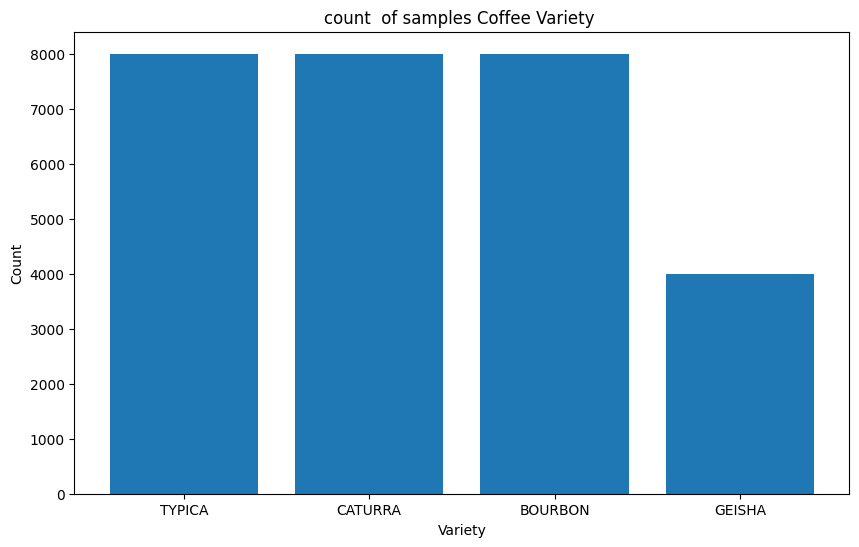

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


# Grafico de barras de las muestras de las varidades del cafe
plt.figure(figsize=(10, 6))
plt.bar(cantidad_por_variedad.index, cantidad_por_variedad.values)
plt.xlabel('Variety')
plt.ylabel('Count')
plt.title('count  of samples Coffee Variety ')#contalas las variedades del cafe
plt.show()


In [ ]:
#Realizamos el submuestreno o undersampling
#Tamaño standar de cantidad de las muestras
sample_size = 4000

# almacenar los DataFrames balanceados
balanced_data_frames = []

# undersampling  aleatorio para cada variedad
for variety in varieties:
    variety_data = combined_data[combined_data['Variety'] == variety]
    if variety_data.shape[0] > sample_size:
        variety_data = variety_data.sample(n=sample_size, random_state=103)
    balanced_data_frames.append(variety_data)

# Concatenar los DataFrames balanceados
balanced_data = pd.concat(balanced_data_frames, ignore_index=True)

# Almacenamos en una variables para que utilizarlo si deseamos contar las muestras x variedad
cantidad_por_variedad = balanced_data['Variety'].value_counts()

In [ ]:
#validamos que sea aleotria el undersampling
balanced_data.head()

,Muestra,0,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,Variety
0,muestra812,0.388879,0.384391,0.378992,0.375825,0.371336,0.368626,0.364374,0.358983,0.351019,...,0.318305,0.318561,0.319404,0.320120,0.320230,0.320844,0.321077,0.321238,0.320771,TYPICA
1,muestra6692,0.234298,0.232949,0.232295,0.231417,0.230636,0.230077,0.229000,0.228379,0.227043,...,0.200776,0.201338,0.201965,0.202695,0.203464,0.204398,0.205371,0.206235,0.206437,TYPICA
2,muestra2708,0.685678,0.682618,0.680548,0.678206,0.675593,0.674100,0.671217,0.666705,0.659954,...,0.614749,0.614848,0.615281,0.616086,0.616399,0.616895,0.617498,0.618059,0.618443,TYPICA
3,muestra7345,0.168863,0.167240,0.165858,0.164698,0.163203,0.162313,0.160983,0.160079,0.158658,...,0.136552,0.137095,0.137923,0.138827,0.139607,0.140683,0.141779,0.142695,0.143316,TYPICA
4,muestra2766,0.685762,0.683054,0.680933,0.678800,0.676426,0.675203,0.672616,0.668423,0.661475,...,0.614666,0.614534,0.614797,0.615561,0.615872,0.616504,0.617183,0.617729,0.618038,TYPICA


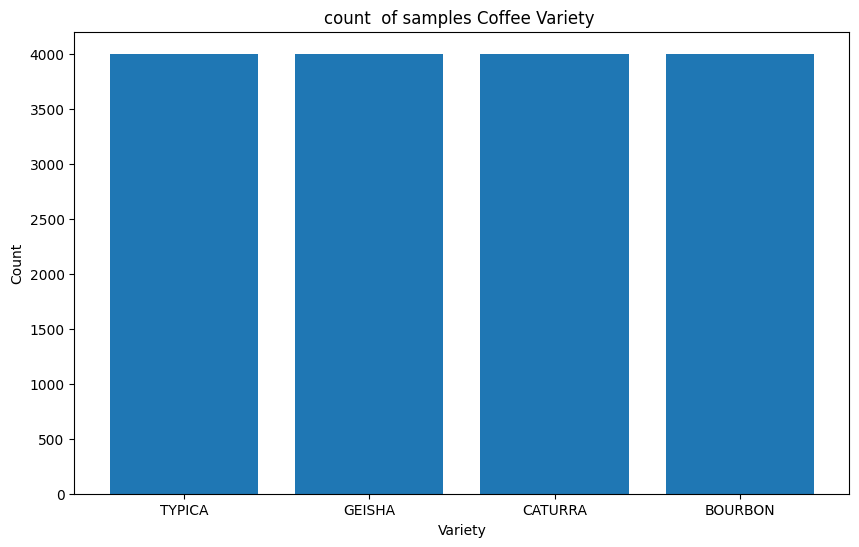

In [ ]:
# Mostramos la nueva Grafica de las cantidades para validar la ingualdad
plt.figure(figsize=(10, 6))
plt.bar(cantidad_por_variedad.index, cantidad_por_variedad.values)
plt.xlabel('Variety')
plt.ylabel('Count')
plt.title('count  of samples Coffee Variety ')#contalas las variedades del cafe
plt.show()

In [ ]:
#mezclar la data para un mejor entramiento
combined_data = balanced_data.sample(frac=1,random_state=103)
#mostramos las 5 primeras filas
combined_data.head()

,Muestra,0,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,Variety
2745,muestra6401,0.248069,0.246694,0.245627,0.244695,0.243708,0.242885,0.241515,0.240814,0.239367,...,0.228333,0.228942,0.229822,0.230791,0.231615,0.232795,0.233872,0.234843,0.235284,TYPICA
3889,muestra598,0.455566,0.450722,0.446079,0.442672,0.438409,0.435687,0.432113,0.426528,0.418606,...,0.390716,0.391307,0.392003,0.392622,0.392539,0.393116,0.393132,0.393307,0.392460,TYPICA
14232,muestra7733,0.319914,0.316871,0.313976,0.312582,0.309344,0.311125,0.308827,0.308260,0.306142,...,0.301221,0.299683,0.298834,0.298704,0.297574,0.298325,0.298377,0.298069,0.294422,BOURBON
13529,muestra7395,0.257086,0.255257,0.253251,0.252906,0.251163,0.253132,0.252369,0.252444,0.251471,...,0.276660,0.275195,0.274117,0.273914,0.272352,0.273071,0.272677,0.271955,0.268266,BOURBON
14,muestra5394,0.238595,0.237130,0.235588,0.234470,0.233072,0.232009,0.230663,0.229685,0.228078,...,0.197410,0.197981,0.198827,0.199778,0.200560,0.201643,0.202685,0.203607,0.204199,TYPICA


In [ ]:
#mostramos las 5 ultimas filas
combined_data.tail()

,Muestra,0,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,Variety
14137,muestra2386,0.353241,0.348211,0.344223,0.342234,0.338662,0.340878,0.339456,0.338531,0.336562,...,0.364646,0.362640,0.360713,0.360549,0.357975,0.359628,0.358446,0.358322,0.351962,BOURBON
7515,muestra3516,0.447206,0.440389,0.431773,0.427208,0.420235,0.416904,0.411895,0.407571,0.402561,...,0.331930,0.331395,0.331634,0.331868,0.332406,0.332947,0.333899,0.334173,0.334146,GEISHA
7955,muestra3956,0.488662,0.480532,0.472850,0.468139,0.460058,0.457128,0.451305,0.446997,0.442184,...,0.400480,0.400022,0.400382,0.400618,0.400212,0.400845,0.401481,0.401514,0.400172,GEISHA
15433,muestra5568,0.245135,0.244479,0.243875,0.243271,0.242566,0.242489,0.242344,0.241712,0.241525,...,0.217696,0.217610,0.217010,0.216911,0.216114,0.216379,0.215687,0.215890,0.214690,BOURBON
5895,muestra1896,0.200646,0.199369,0.198932,0.198220,0.197862,0.197201,0.197206,0.198160,0.199959,...,0.212928,0.212808,0.212544,0.212430,0.212174,0.211855,0.211554,0.211422,0.210948,GEISHA


In [ ]:
# Seleccionar solo las columnas que tengan valores numericos // asi no tocamos las cabecera
X_numeric = combined_data.select_dtypes(include=[np.number])

# Aplicar SNV
X_snv = snv(X_numeric.values)

# Convertir de nuevo a DataFrame
X_snv_df = pd.DataFrame(X_snv, columns=X_numeric.columns)
X_snv_df['Variety'] = combined_data['Variety'].values

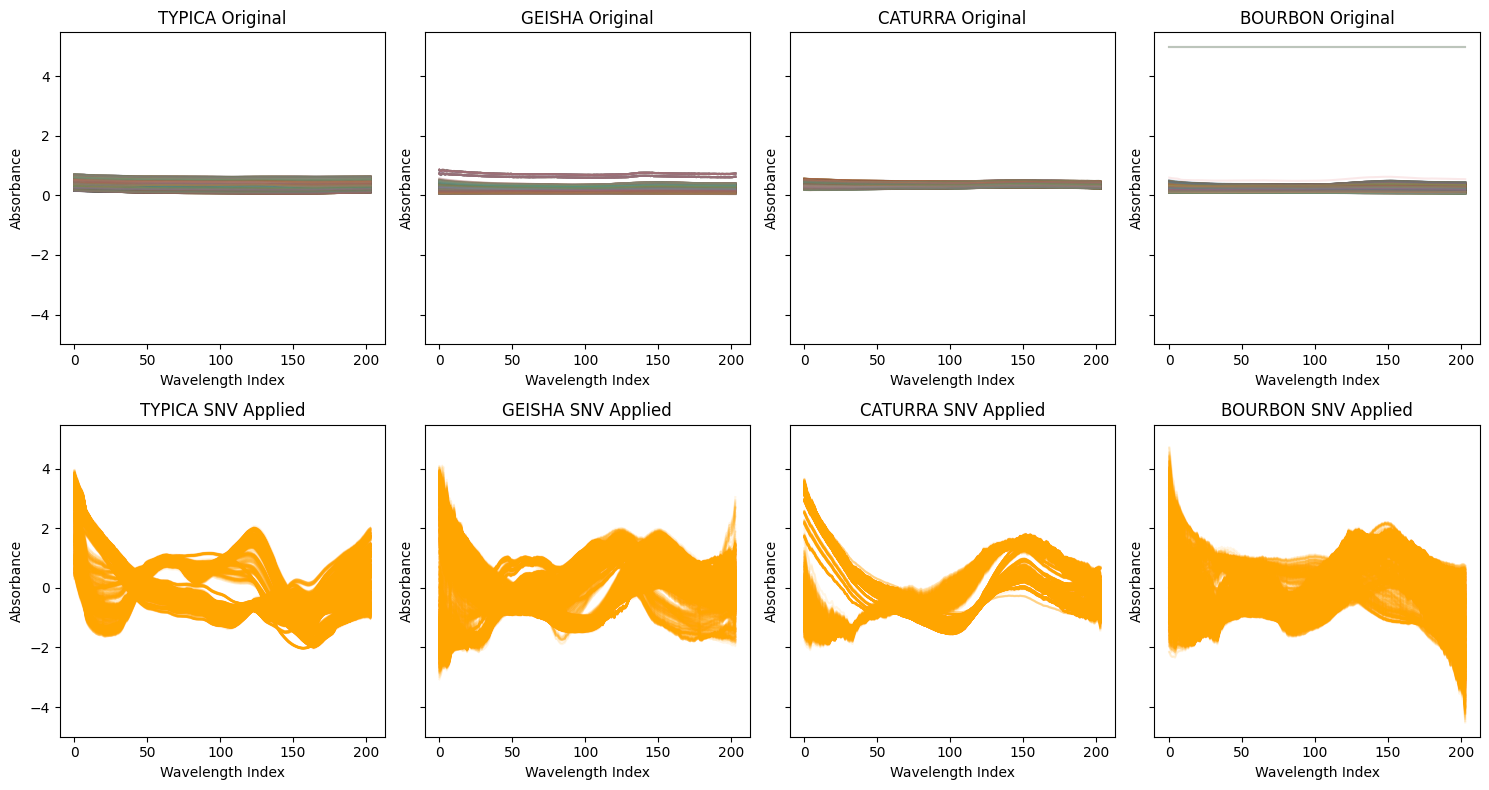

In [ ]:
# Graficar los datos antes y después de SNV separando por variedad
colors = ['blue', 'red', 'green', 'purple']
fig, axes = plt.subplots(nrows=2, ncols=len(varieties), figsize=(15, 8), sharey=True)
for i, variety in enumerate(varieties):
    variety_data = X_numeric[combined_data['Variety'] == variety]
    variety_snv_data = X_snv_df[X_snv_df['Variety'] == variety].iloc[:, :-1]

    axes[0, i].plot(variety_data.T, alpha=0.1)
    axes[0, i].set_title(f'{variety} Original')
    axes[0, i].set_xlabel('Wavelength Index')
    axes[0, i].set_ylabel('Absorbance')

    axes[1, i].plot(variety_snv_data.T, alpha=0.1, color='orange')
    axes[1, i].set_title(f'{variety} SNV Applied')
    axes[1, i].set_xlabel('Wavelength Index')
    axes[1, i].set_ylabel('Absorbance')

plt.tight_layout()
plt.show()

In [ ]:
# Separar las características del svn  y las etiquetas de las variedades
X = X_snv_df.iloc[:, :-1].values
y = X_snv_df['Variety'].values


In [ ]:
#Aplicar PCA con 3 componentes principales
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Variety'] = y

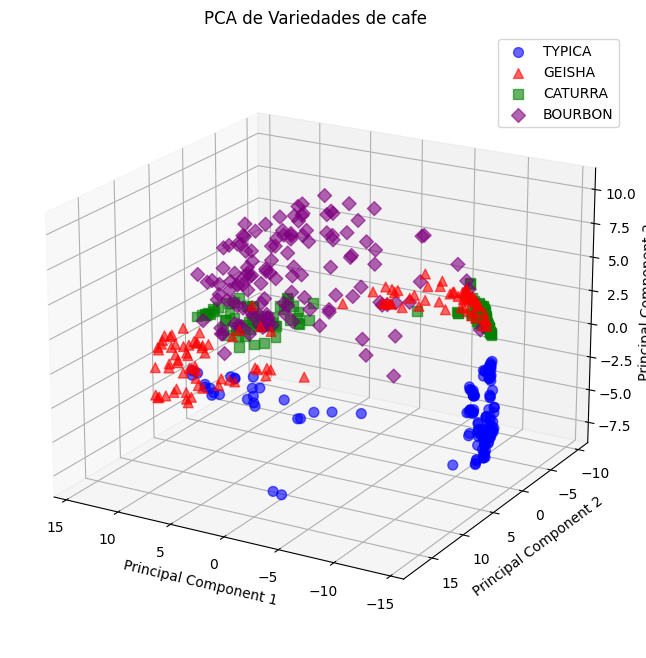

In [ ]:
from itertools import cycle
# Visualizar los componentes principales en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# varieties = ['TYPICA', 'GEISHA', 'CATURRA','BOURBON']

# Reducimos la vista para poder mostrarlo
pca_df = pca_df.sample(n=500, random_state=42)

colors = cycle(['blue', 'red', 'green', 'purple'])
markers = cycle(['o', '^', 's', 'D'])

for variety, color, marker in zip(varieties, colors, markers):
    indices = pca_df['Variety'] == variety
    ax.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], pca_df.loc[indices, 'PC3'],
               label=variety, alpha=0.6, color=color, marker=marker, s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA de Variedades de cafe ')
ax.view_init(elev=20, azim=120) ##rotacion de la vista
ax.legend()
plt.show()

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=103)

print(X_train.shape)
print(X_test.shape)

(10720, 204)
(5280, 204)


In [ ]:
# Entrenar el modelo SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)


SVC(probability=True)

In [ ]:
#puntaje
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)
svm.score(X_train,y_train)

0.9529850746268657

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)

In [ ]:
# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Convertir etiquetas categóricas a binarias para ROC AUC
from sklearn.preprocessing import LabelBinarizer # Import the necessary class
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_prob_binarized = lb.transform(y_prob.argmax(axis=1))
roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr')

In [ ]:
# Mostrar las métricas de evaluación
evaluation_metrics = {
    'Accuracy': accuracy,
    'ROC AUC': roc_auc
}
print(evaluation_metrics)

{'Accuracy': 0.9564393939393939, 'ROC AUC': 0.9965853298838129}


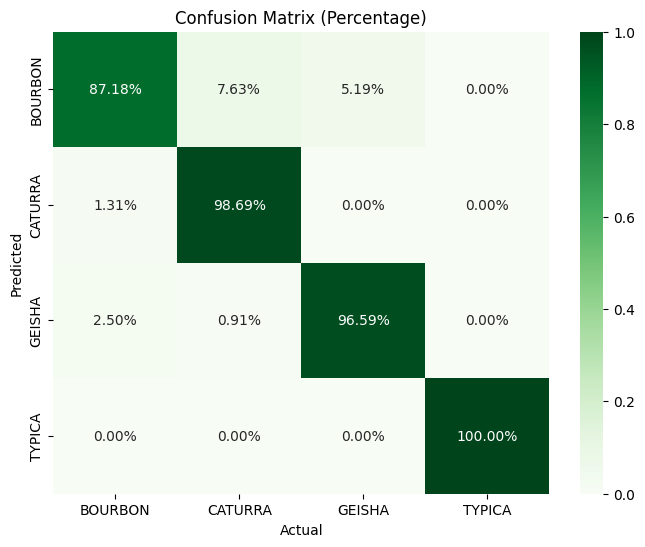

In [ ]:
# Normalizar la matriz de confusión
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Visualizar la matriz de confusión normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2%', cmap='Greens', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Percentage)')
plt.show()


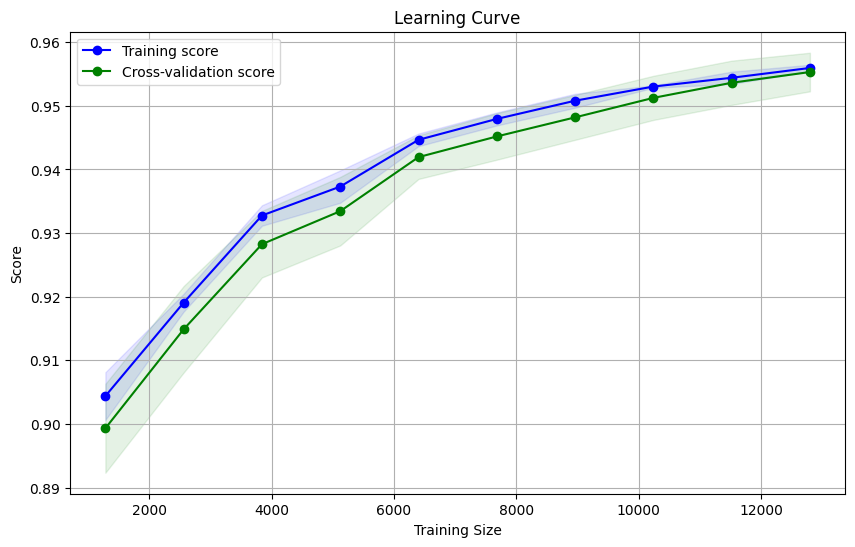

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(svm, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
# Calcular Sensibilidad, Exactitud y Precisión para cada clase y sus promedios
sensibilidad = recall_score(y_test, y_pred, average=None)
exactitud = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)

print('Promedio de métricas:')
print(f'Sensibilidad Promedio: {sensibilidad.mean():.2f}')
print(f'Exactitud: {exactitud:.2f}')
print(f'Precisión Promedio: {precision.mean():.2f}')

Promedio de métricas:
Sensibilidad Promedio: 0.96
Exactitud: 0.96
Precisión Promedio: 0.96
